<a href="https://colab.research.google.com/github/shishirjain/Solution-Machine-Learning-using-python.-Manaranjan-Pradhan/blob/main/Chapter_6_Advanced_MachineLearning_using_Python_by_Manaranjan_Pradhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data')
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


1. Find out the number cases available in the dataset for chd and no chd. Is it an imbalanced data- set for classification modelling? Plot the findings using a bar plot, where x is chd or no chd and y gives the count of samples in each group.


In [ ]:
df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

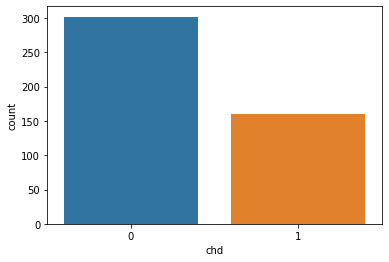

In [ ]:
sns.countplot(x='chd',data=df)

2. To create a balanced dataset, do upsampling of chd cases to be same as number of no chd cases. For upsampling, use resampling with replacement technique.

In [ ]:
from sklearn.utils import resample
df_chd_yes=df[df['chd']==1]
df_minority_sample=resample(df_chd_yes,replace=True,n_samples=100)

In [ ]:
df_minority_sample.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
91,92,120,3.70,4.02,39.66,Absent,61,30.57,0.00,64,1
446,448,142,0.00,4.32,25.22,Absent,47,28.92,6.53,34,1
80,81,114,3.00,7.04,22.64,Present,55,22.59,0.00,45,1
280,282,106,1.08,4.37,26.08,Absent,67,24.07,17.74,28,1
25,26,124,4.00,12.42,31.29,Present,54,23.23,2.06,42,1


In [ ]:
new_df=pd.concat([df,df_minority_sample])

In [ ]:
from sklearn.utils import shuffle

In [ ]:
new_df=shuffle(new_df)
new_df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
127,128,136,3.96,2.76,30.28,Present,50,34.42,18.51,38,0
409,411,120,0.00,3.10,26.97,Absent,41,24.80,0.00,16,0
357,359,136,6.60,6.08,32.74,Absent,64,33.28,2.72,49,0
85,86,130,0.56,3.30,30.86,Absent,49,27.52,33.33,45,0
253,254,146,7.50,7.21,25.93,Present,55,22.51,0.51,42,0


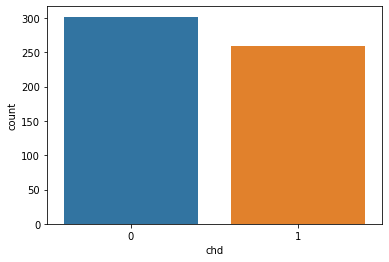

In [ ]:
sns.countplot(x='chd',data=new_df)

3. Maintain two datasets – imbalanced dataset (original one) and balanced dataset – using the upsampling approach. Split each of the datasets into 80:20 splits for creating training and test sets.


In [ ]:
famhist={'Present':1,'Absent':0}
df['famhist']=df.famhist.map(famhist)
new_df['famhist']=new_df.famhist.map(famhist)

In [ ]:
from sklearn.model_selection import train_test_split
train_NX,test_NX,train_ny,test_ny=train_test_split(new_df.loc[:,'sbp':'age'],new_df['chd'],test_size=0.2,random_state=42)
train_X,test_X,train_y,test_y=train_test_split(df.loc[:,'sbp':'age'],df['chd'],test_size=0.2,random_state=42)

4. Build a logistic regression model using both the imbalanced and balanced datasets and compare results. Use K-fold cross-validation (k = 5) and ROC AUC score for comparing the model performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
logit=LogisticRegression()
cv_scores=cross_val_score(logit,train_X,train_y,cv=5,scoring='roc_auc')

In [ ]:
print(cv_scores, np.mean(cv_scores),np.std(cv_scores))

[0.8122449  0.78367347 0.69632653 0.74278846 0.74333333] 0.7556733385661957 0.039559292353804405


In [ ]:
n_logit=LogisticRegression()
ncv_scores=cross_val_score(n_logit,train_NX,train_ny,cv=5,scoring='roc_auc')
print(ncv_scores, "with mean",np.mean(ncv_scores),"and std dev",np.std(ncv_scores))

[0.74751984 0.8139881  0.79910935 0.81791192 0.7993921 ] with mean 0.7955842620736238 and std dev 0.02519658711482158


We can clearly see that mean accuracy is higher in balanced dataset


5.Build a RandomForest model using balanced dataset Usegrid search mechanism to find the most optimal values of the following parameters:

 n_estimators = [50, 100, 200, 500]

 max_depth = [3, 5, 7, 9]

 max_features = [0.1, 0.2, 0.3, 0.5]

Find the best model based on ROC_AUC score.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tuned_param=[{'n_estimators' :[50, 100, 200, 500],
              'max_depth' : [3, 5, 7, 9],
              'max_features' :[0.1, 0.2, 0.3, 0.5]}]
rand_clf=RandomForestClassifier()
clf=GridSearchCV(rand_clf,tuned_param,cv=5,scoring='roc_auc')
clf.fit(train_NX,train_ny)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
clf.best_score_

0.8614057848935385

In [ ]:
clf.best_params_

{'max_depth': 9, 'max_features': 0.2, 'n_estimators': 500}

In [ ]:
random_clf=RandomForestClassifier(max_depth=9,
                                  n_estimators=200,
                                  max_features=0.2)
random_clf.fit(train_NX,train_ny)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

6. Find features importance from the model built in Question 5 and report the top features which explain 95% of information or variance in the dataset.

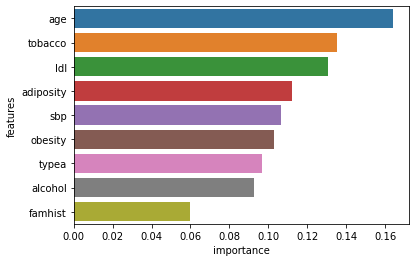

In [ ]:
feature_rank=pd.DataFrame({'features':train_NX.columns,
                           'importance':random_clf.feature_importances_})
sns.barplot(y='features',x='importance', data=feature_rank.sort_values('importance',ascending=False))

In [ ]:
feature_rank=feature_rank.sort_values('importance',ascending=False)
feature_rank['cum_sum']=feature_rank.importance.cumsum()*100
feature_rank

,features,importance,cum_sum
8,age,0.163818,16.381761
1,tobacco,0.135082,29.889935
2,ldl,0.130518,42.941711
3,adiposity,0.111963,54.138011
0,sbp,0.106740,64.812029
6,obesity,0.102652,75.077208
5,typea,0.096824,84.759641
7,alcohol,0.092837,94.043305
4,famhist,0.059567,100.000000


Features that report 95% of imformationa and variance are:

In [ ]:
imp_col=feature_rank.features[feature_rank.cum_sum<96].to_list()
imp_col

['age', 'tobacco', 'ldl', 'adiposity', 'sbp', 'obesity', 'typea', 'alcohol']

7.Build a decision tree model using the features selected above and the following parameters:
*   max_depth = 4
*   Criterion = “entropy”

Interpret the rules generated by the decision tree. Explain how these rules can be used in the real
world.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(max_depth=4,
                                criterion='entropy')

In [ ]:
clf_tree.fit(train_NX[imp_col],train_ny)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

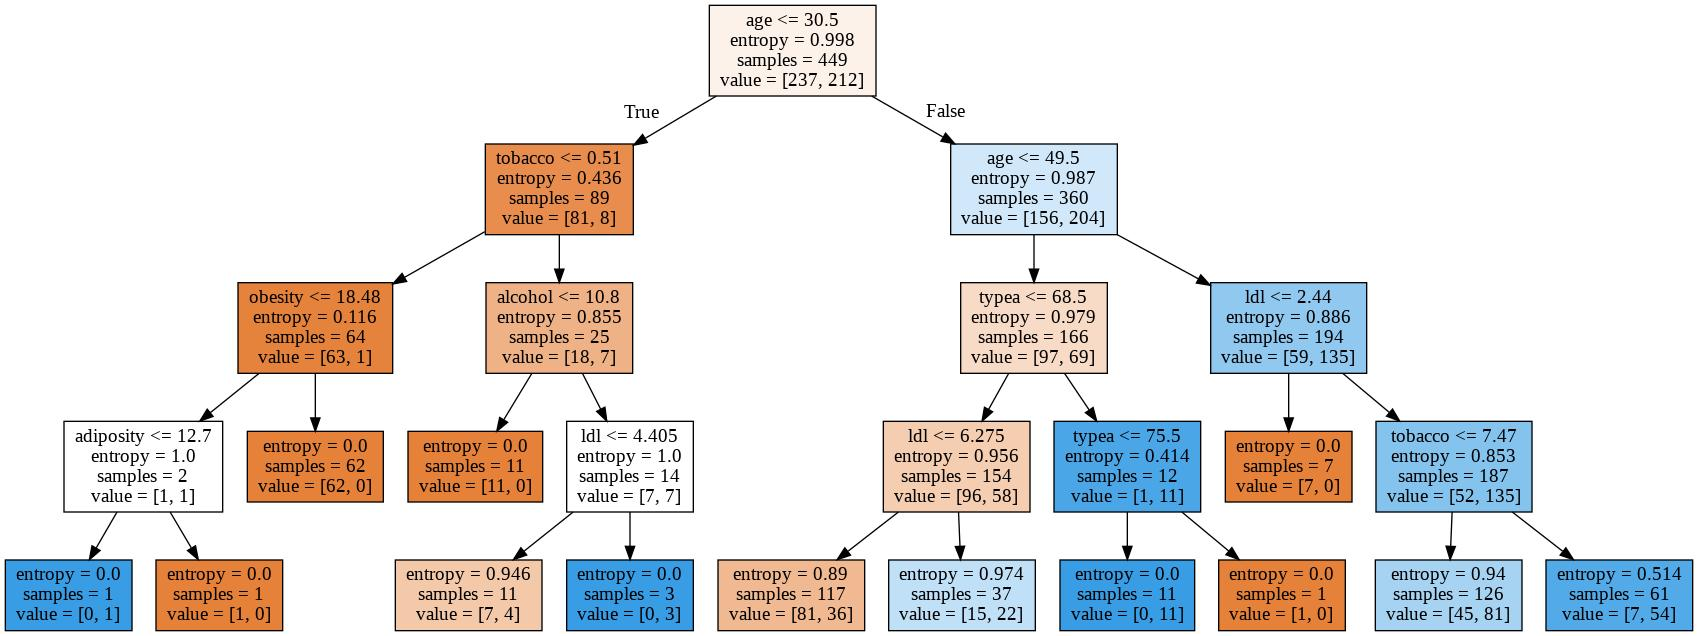

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

export_graphviz(clf_tree, out_file='chd_tree.odt',
                feature_names=train_NX[imp_col].columns,
                filled=True)

chd_tree_graph=pdot.graphviz.graph_from_dot_file('chd_tree.odt')
chd_tree_graph.write_jpg('chd_tree.png')
Image(filename='chd_tree.png')

8. How many cases of manipulators versus non-manipulators are there in the dataset? Draw a bar plot to depict.


In [ ]:
data=pd.read_csv('/content/Earnings Manipulation 220.csv')

In [ ]:
data.head()

,Company Name,Year Ending,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
0,1,31-03-2014,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,2,31-03-2009,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,3,31-03-2008,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,4,31-03-2014,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,5,31-03-2010,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


In [ ]:
data.shape

(220, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  220 non-null    int64  
 1   Year Ending   220 non-null    object 
 2   DSRI          220 non-null    float64
 3   GMI           220 non-null    float64
 4   AQI           220 non-null    float64
 5   SGI           220 non-null    float64
 6   DEPI          220 non-null    float64
 7   SGAI          220 non-null    float64
 8   ACCR          220 non-null    float64
 9   LEVI          220 non-null    float64
 10  MANIPULATOR   220 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 19.0+ KB


In [ ]:
data.MANIPULATOR.value_counts()

0    181
1     39
Name: MANIPULATOR, dtype: int64

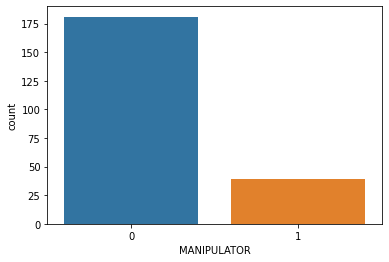

In [ ]:
sns.countplot(x=data['MANIPULATOR'])

Data is imbalanced. So we need to resampling.


In [ ]:
data['Year Ending']=pd.to_datetime(data['Year Ending'])

In [ ]:
data['Year Ending'].dtypes

dtype('<M8[ns]')

In [ ]:
data['Year Ending'].dt.day.value_counts()

31    219
30      1
Name: Year Ending, dtype: int64

In [ ]:
data['Year Ending'].dt.year.value_counts()

2014    187
2012     11
2008      6
2013      4
2010      4
2015      3
2009      3
2011      2
Name: Year Ending, dtype: int64

In [ ]:
data['Year Ending']= data['Year Ending'].dt.year

9. Create a 80:20 partition, and find how many positives are present in the test data.

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(data.loc[:,'Company Name':'LEVI'],data['MANIPULATOR'],test_size=0.2,random_state=42,stratify=data['MANIPULATOR'])

In [ ]:
test_y.value_counts()

0    36
1     8
Name: MANIPULATOR, dtype: int64

10. The number of cases of manipulators are very less compared to non-manipulators. Use upsampling
technique to create a balance dataset.

In [ ]:
train_X.shape

(176, 10)

In [ ]:
train=train_X.join(train_y)

In [ ]:
train.MANIPULATOR.value_counts()

0    145
1     31
Name: MANIPULATOR, dtype: int64

In [ ]:
from sklearn.utils import resample

In [ ]:
train_upsample=resample(train[train['MANIPULATOR']==1],replace=True,n_samples=114)

In [ ]:
new_train=pd.concat([train,train_upsample])

In [ ]:
new_train.loc[:,'MANIPULATOR'].head()

5      1
184    0
165    0
137    0
62     0
Name: MANIPULATOR, dtype: int64

11. Build the following models using balanced dataset and compare the accuracies. Use ROC AUC score for accuracy.                  

 Random Forest

 AdaBoost with Logistic Regression as base estimator

 Gradient Boosting





In [ ]:
tuned_parameters=[{'max_depth':[10,15],
                   'n_estimators':[10,20],
                   'max_features':['sqrt',0.2]}]
from sklearn.ensemble import RandomForestClassifier

randf_clf=RandomForestClassifier()
clf=GridSearchCV(randf_clf,tuned_parameters,cv=5,scoring='roc_auc')

clf.fit(new_train.loc[:,'Year Ending':'LEVI'],new_train.loc[:,'MANIPULATOR'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
clf.best_score_

1.0

In [ ]:
tuned_parameters=[{'max_depth':[10,15],
                   'n_estimators':[10,20],
                   'max_features':['sqrt',0.2]}]
from sklearn.ensemble import RandomForestClassifier

randf_clf=RandomForestClassifier()
clf=GridSearchCV(randf_clf,tuned_parameters,cv=5,scoring='roc_auc')

clf.fit(train_X,train_y)
clf.best_score_

1.0

In [ ]:
clf.best_params_11

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}

In [ ]:
clf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}

In [ ]:
randfrst_clf=RandomForestClassifier(max_depth= 10, max_features='sqrt', n_estimators= 10)
randfrst_clf.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
randfrst_clf=RandomForestClassifier(max_depth= 10, max_features='sqrt', n_estimators= 10)
randfrst_clf.fit(new_train.loc[:,'Year Ending':'LEVI'],new_train.loc[:,'MANIPULATOR'])



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics

In [ ]:
predict_prob=pd.DataFrame(randfrst_clf.predict_proba(test_X),columns=['no','yes'])

In [ ]:
test_X.head()

,Company Name,Year Ending,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
127,128,2014,1.138698,1.023652,1.040149,1.271624,0.922946,1.141844,0.014421,0.989918
31,32,2013,1.322662,1.000000,0.939322,1.215182,1.047782,1.206064,0.041868,0.848333
36,37,2015,1.427451,1.005147,0.465712,1.569888,0.906374,0.849488,0.197597,0.842004
102,103,2014,1.080524,1.001379,1.003719,1.191511,0.950242,0.905956,-0.053091,1.141956
40,41,2014,1.101014,0.985565,9.852416,1.013278,1.058948,0.871900,-0.044073,0.984907


In [ ]:
test_y.head()

127    0
31     1
36     1
102    0
40     0
Name: MANIPULATOR, dtype: int64

In [ ]:
predict_prob.reset_index().head()

,index,no,yes
0,0,1.0,0.0
1,1,0.0,1.0
2,2,0.2,0.8
3,3,1.0,0.0
4,4,1.0,0.0


In [ ]:
test_result_df=pd.DataFrame({'Actual':test_y})
test_result_df=test_result_df.reset_index()
test_result_df.head()

,index,Actual
0,127,0
1,31,1
2,36,1
3,102,0
4,40,0


In [ ]:
fpr,tpr,threshold=metrics.roc_curve(test_result_df['Actual'],predict_prob['yes'],drop_intermediate=False)

In [ ]:
auc_score=metrics.roc_auc_score(test_result_df['Actual'],predict_prob['yes'])
auc_score

1.0

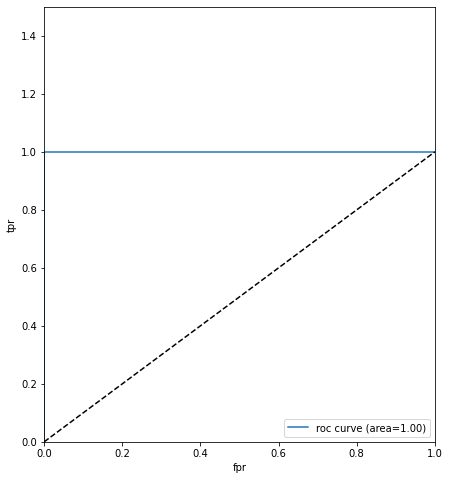

In [ ]:
plt.figure(figsize=[7,8])
plt.plot(fpr,tpr,label='roc curve (area=%0.2f)' % auc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1.5])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
logref_clf=LogisticRegression()

In [ ]:
ada_clf= AdaBoostClassifier(logref_clf,n_estimators=50)
ada_clf.fit(new_train.loc[:,'Year Ending':'LEVI'],new_train.loc[:,'MANIPULATOR'])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [ ]:
ada_prob=pd.DataFrame(ada_clf.predict_proba(test_X.loc[:,'Year Ending':'LEVI']),columns=['no','yes'])

In [ ]:
ada_prob.head()

,no,yes
0,0.508755,0.491245
1,0.500294,0.499706
2,0.511262,0.488738
3,0.510823,0.489177
4,0.488606,0.511394


In [ ]:
metrics.roc_auc_score(test_result_df['Actual'],ada_prob['yes'])

0.9305555555555556

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)

In [ ]:
gboost_clf.fit(new_train.loc[:,'Year Ending':'LEVI'],new_train.loc[:,'MANIPULATOR'])
gboost_prob=pd.DataFrame(gboost_clf.predict_proba(test_X.loc[:,'Year Ending':'LEVI']),columns=['no','yes'])

In [ ]:
gboost_prob.head()

,no,yes
0,0.999725,0.000275
1,0.000196,0.999804
2,0.000925,0.999075
3,0.999725,0.000275
4,0.001225,0.998775


In [ ]:
metrics.roc_auc_score(test_result_df['Actual'],gboost_prob['yes'])

1.0

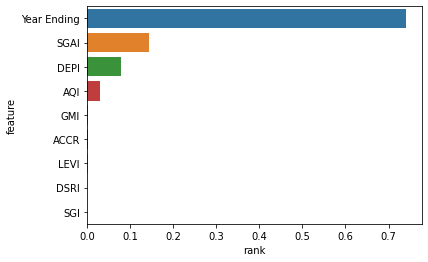

In [ ]:
feature_rank=pd.DataFrame({'feature':train_X.loc[:,'Year Ending':].columns,'rank':gboost_clf.feature_importances_})
feature_rank=feature_rank.sort_values('rank',ascending=False)
sns.barplot(data=feature_rank,y='feature',x='rank')